In [1]:
import pandas as pd
from pandas import DataFrame
from sklearn.preprocessing import scale
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl 
import os
import csv

In [2]:
df = pd.read_csv("ar_raw.csv")

In [3]:
# reorder the df so that the graphs are consistent for Answer
df = df.sort_values(['answer']).reset_index(drop=True)

In [17]:
df.head()

,Unnamed: 0,subject,Nat_lang,other_langs,factors,response,trial,story,wh,modal,answer,string
0,383,A1LE6AUI3CJNIT,Spanish,English,high-rabies-where-modal-MA,7,high,rabies,where,modal,MA,"""Neighborhoods A, B, C, and D."""
1,507,A1ATL3G98SFW4V,English,Japanese,low-centralpark-how-nomodal-MA,7,low,centralpark,how,nomodal,MA,"""Ways A, B, C, and D."""
2,319,A1G187YBG0DVMQ,english,german,high-rabies-where-nomodal-MA,7,high,rabies,where,nomodal,MA,"""Neighborhoods A, B, C, and D."""
3,321,A1M8NRHSH58X25,English,NaN,high-rabies-where-nomodal-MA,7,high,rabies,where,nomodal,MA,"""Neighborhoods A, B, C, and D."""
4,322,A3UDUHUVFKD833,English,none,high-rabies-where-nomodal-MA,7,high,rabies,where,nomodal,MA,"""Neighborhoods A, B, C, and D."""


In [19]:
test = df.loc[df.trial.isin(["high","low"])]
test.response = test.response.astype(int)

In [6]:
filler = df.loc[df.trial.isin(["filler"])]
filler.response = filler.response.astype(int)

In [7]:
# filler

In [8]:
low = test.loc[test["trial"].isin(["low"])]
high = test.loc[test["trial"].isin(["high"])]

In [9]:
ms_low = low.loc[low.answer.isin(["MS "])]
mo_low = low.loc[low.answer.isin(["MO "])]

low_msmo = low.loc[low.answer.isin(["MS ","MO "])]

ms_high = high.loc[high.answer.isin(["MS "])]
mo_high = high.loc[high.answer.isin(["MO "])]

high_msmo = high.loc[high.answer.isin(["MS ","MO "])]

In [65]:
ms = test.loc[test.answer.isin(["MS "])]
mo = test.loc[test.answer.isin(["MO "])]
ma = test.loc[test.answer.isin(["MA "])]
mf = test.loc[test.answer.isin(["MF "])]

In [70]:
mod = test.loc[test.modal.isin(["modal"])]
nomod = test.loc[test.modal.isin(["nomodal"])]

In [73]:
len(nomod)

1856

In [24]:
low.groupby(['modal'])['response'].mean()

modal
modal      3.975507
nomodal    3.903017
Name: response, dtype: float64

In [25]:
subj = test.groupby(['factors','subject'])['response'].mean()

# blues
sns.set_palette(sns.cubehelix_palette(5, start=.75, rot=-.75))

# purples
palette = sns.cubehelix_palette(light=.8, n_colors=6)

In [57]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)

In [62]:
low = low.sort_values(['answer']).reset_index(drop=True)

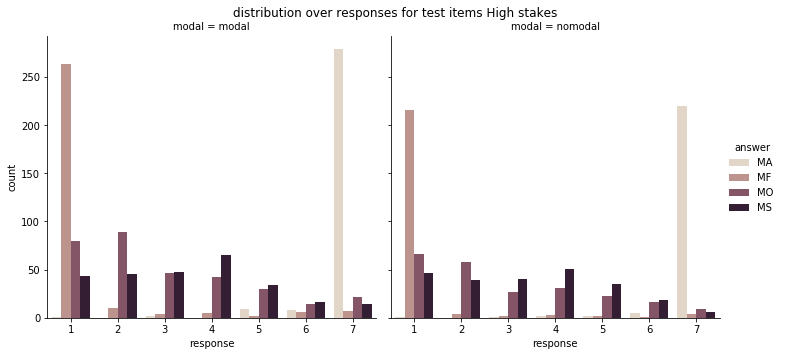

In [75]:
g = sns.catplot(x="response", kind="count", hue="answer", col="modal", palette="ch:.25", data=high)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('distribution over responses for test items High stakes')
plt.show()

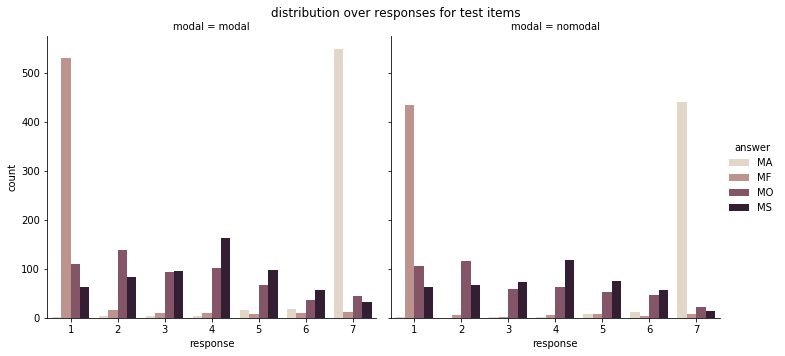

In [76]:
g = sns.catplot(x="response", kind="count", hue="answer", col="modal", palette="ch:.25", data=test)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('distribution over responses for test items')
plt.show()

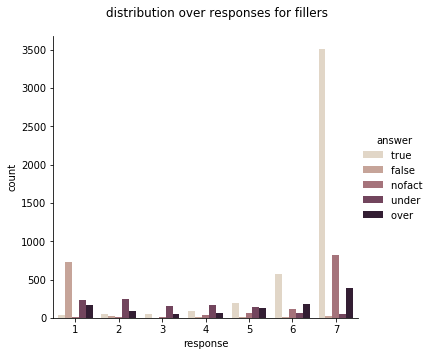

In [51]:
# Trying to get the counts in there
g = sns.catplot(x="response", kind="count", hue="answer", palette="ch:.25", data=filler)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('distribution over responses for fillers')
plt.show()

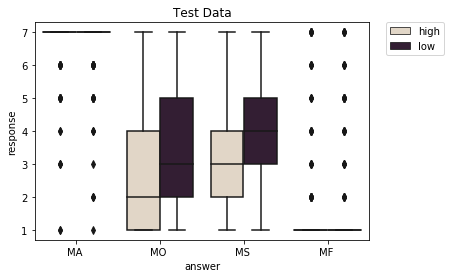

In [40]:
g = sns.boxplot(x="answer",y="response",data=test,hue="trial", palette="ch:.25")
g.set_title("Test Data")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Graphs for each Answer

In [34]:
sns.set(font_scale=2)
sns.set_palette(sns.cubehelix_palette(5, start=.75, rot=-.75))

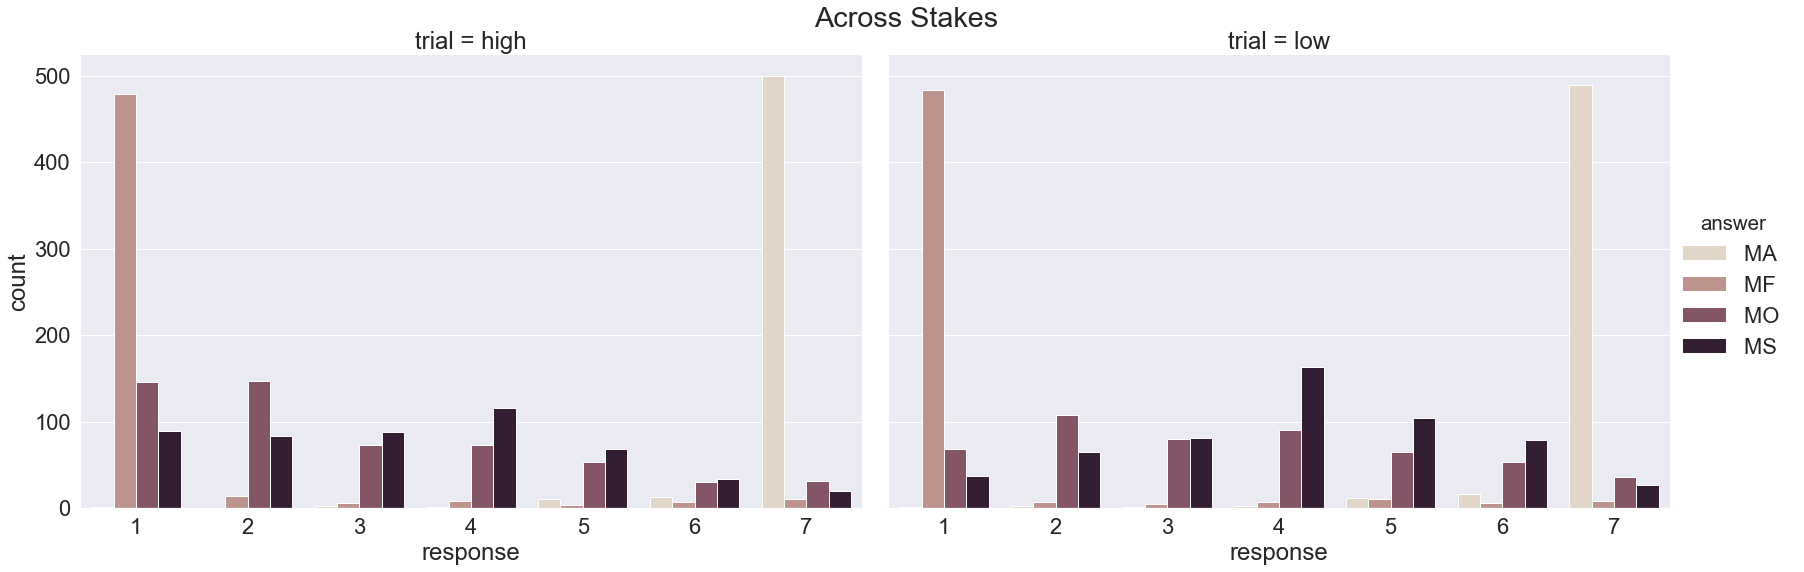

In [48]:
g = sns.catplot(x="response", kind="count", col="trial", hue="answer", palette="ch:.25", data=test, height=8.27, aspect=11.7/8.27)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Across Stakes')
plt.show()

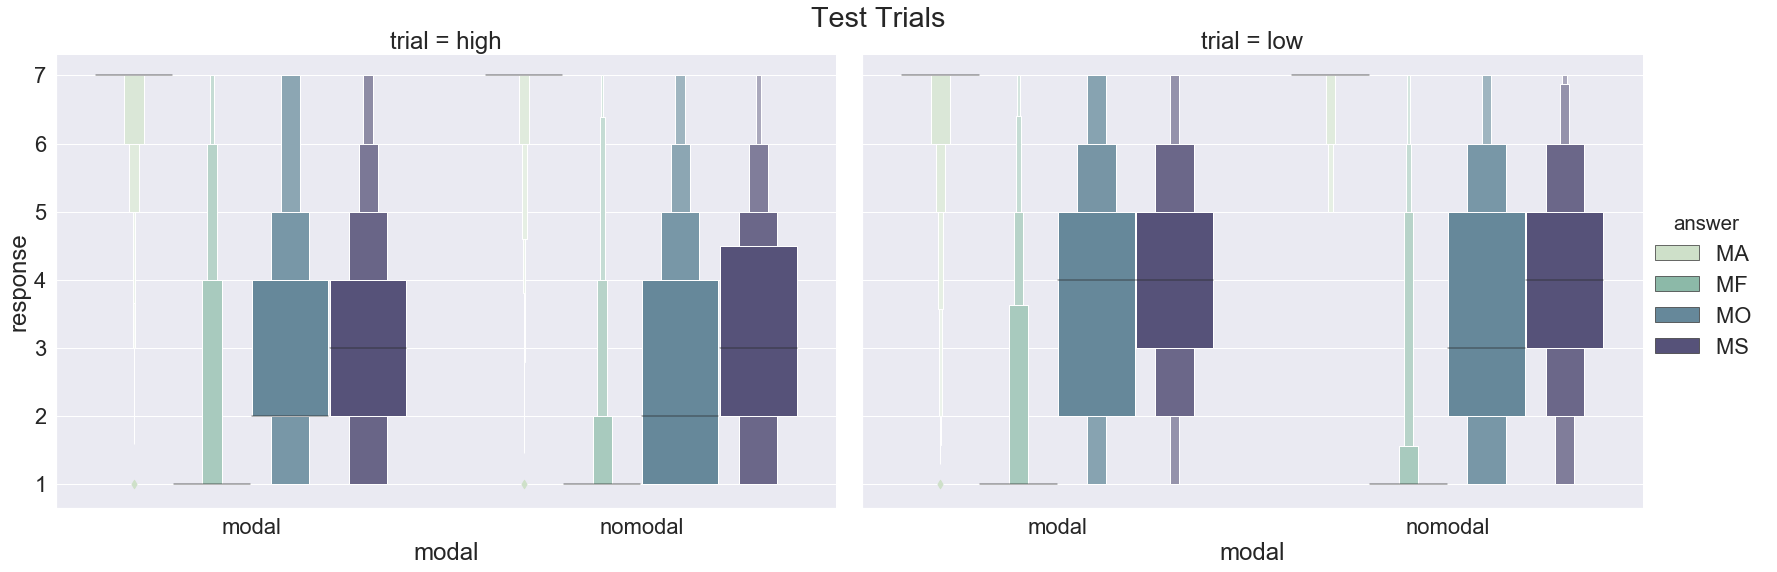

In [53]:
g = sns.catplot(x="modal", y="response", hue="answer",kind="boxen",col="trial", data=test, height=8.27, aspect=11.7/8.27)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Test Trials')
plt.show()

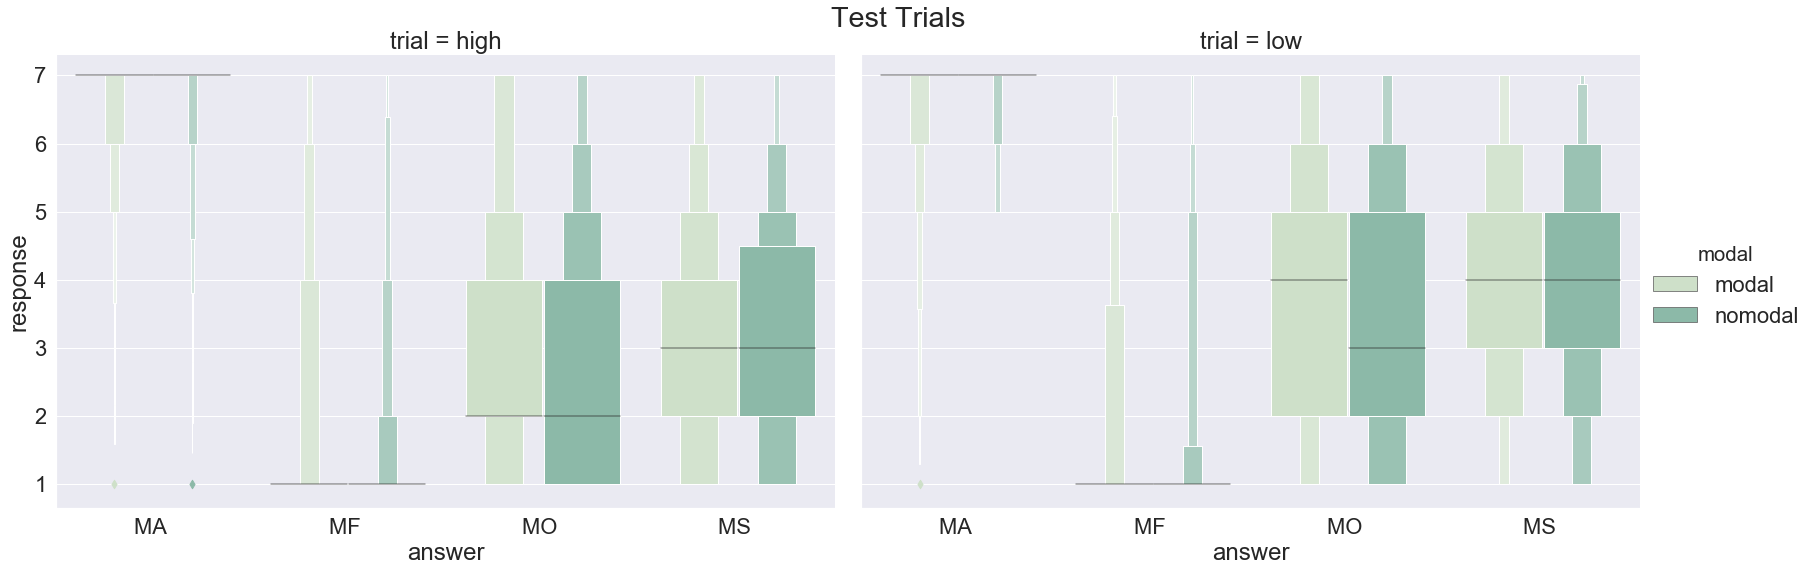

In [54]:
g = sns.catplot(x="answer", y="response", hue="modal",kind="boxen",col="trial", data=test, height=8.27, aspect=11.7/8.27)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Test Trials')
plt.show()

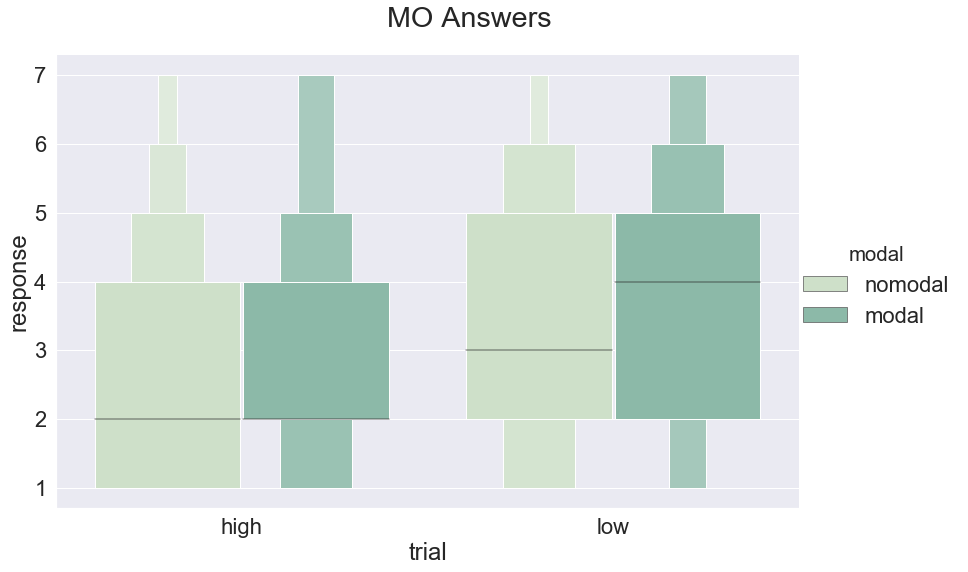

In [55]:
g = sns.catplot(x="trial", y="response", hue="modal",kind="boxen", data=mo, height=8.27, aspect=11.7/8.27)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('MO Answers')
plt.show()

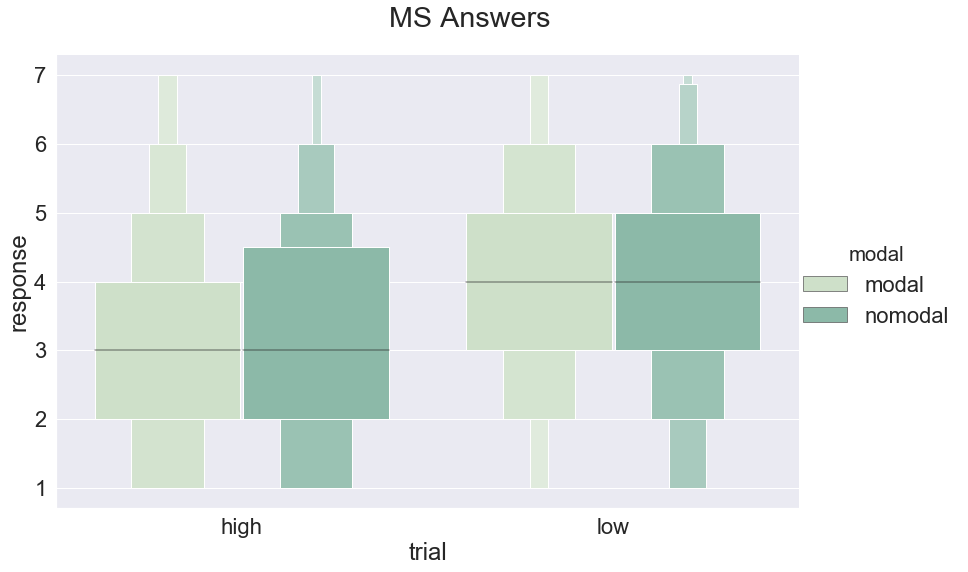

In [57]:
g = sns.catplot(x="trial", y="response", hue="modal",kind="boxen", data=ms, height=8.27, aspect=11.7/8.27)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('MS Answers')
plt.show()

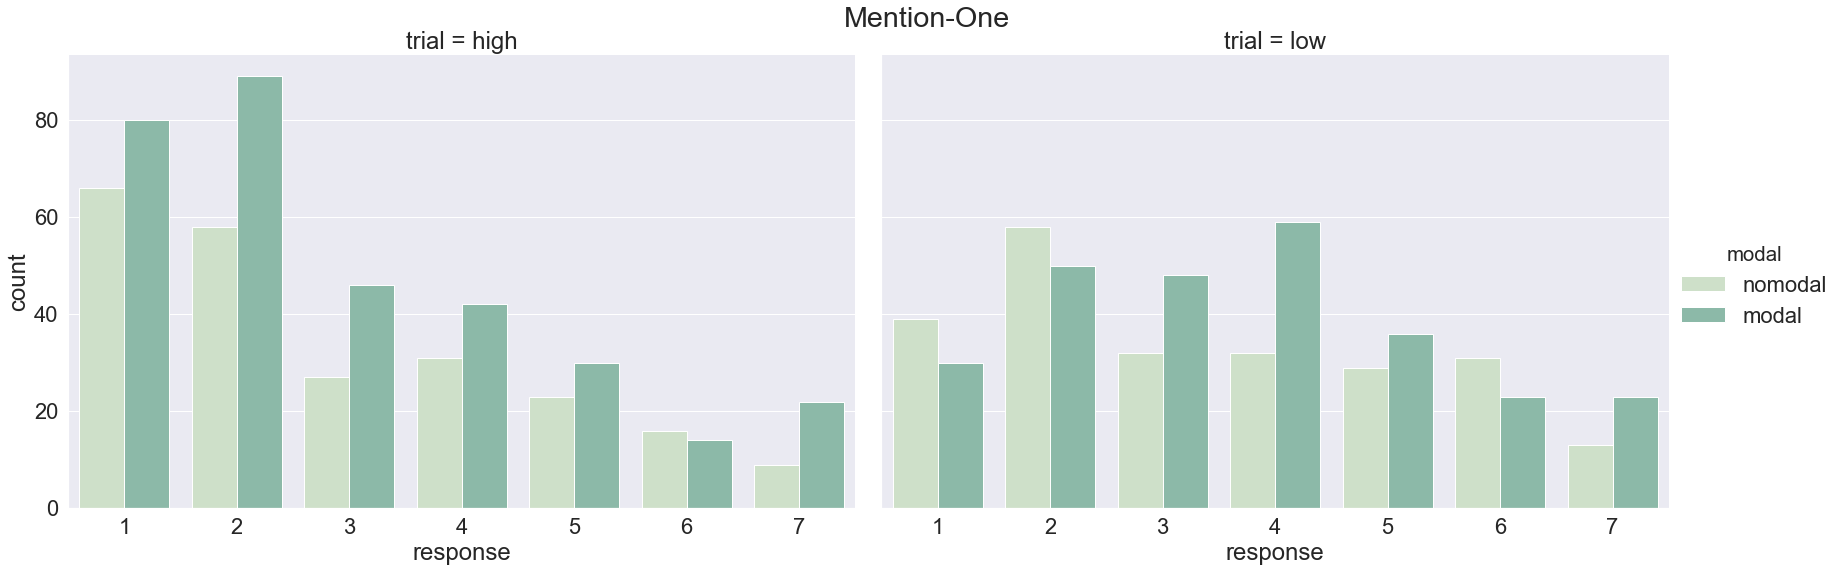

In [63]:
g = sns.catplot(x="response", kind="count", col="trial", hue="modal", data=mo, height=8.27, aspect=11.7/8.27)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Mention-One')
plt.show()

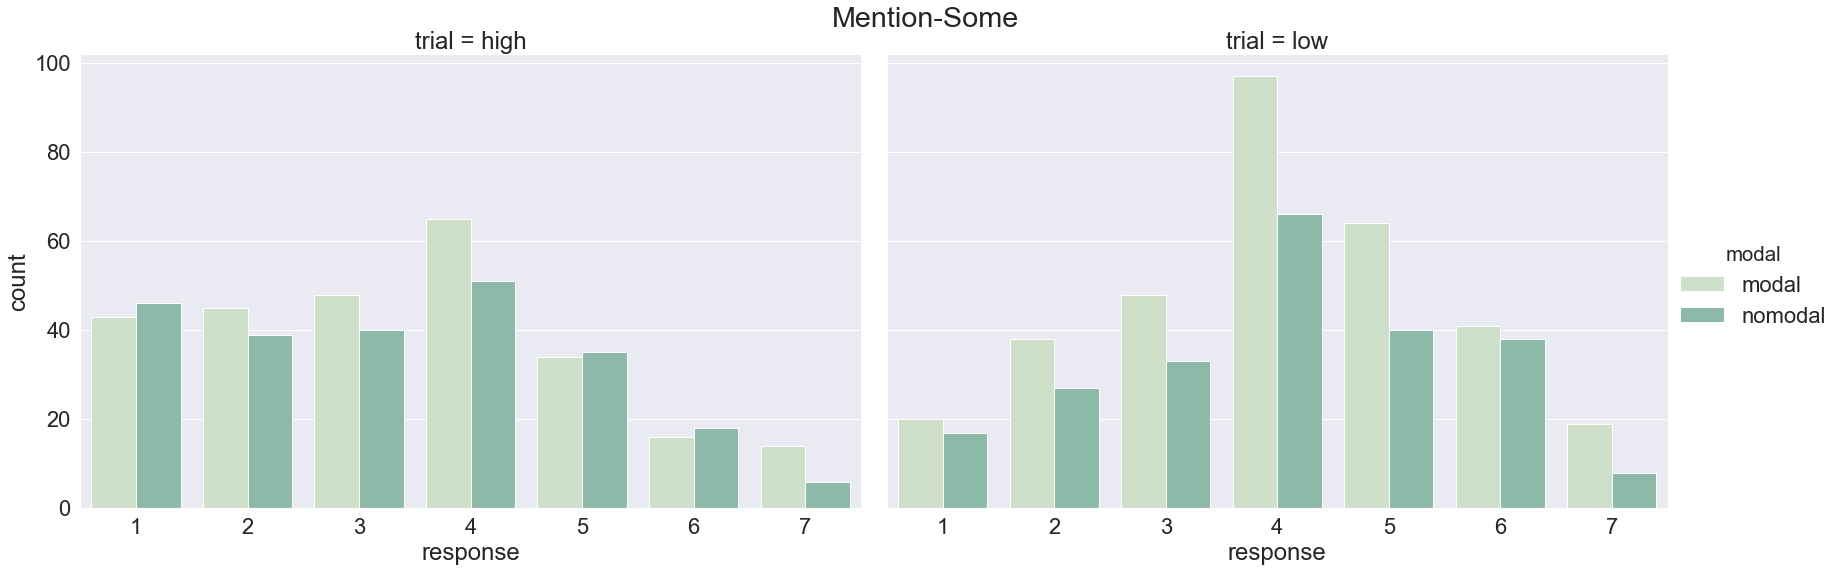

In [64]:
g = sns.catplot(x="response", kind="count", col="trial", hue="modal", data=ms, height=8.27, aspect=11.7/8.27)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Mention-Some')
plt.show()

# Looking at the Fillers

No handles with labels found to put in legend.


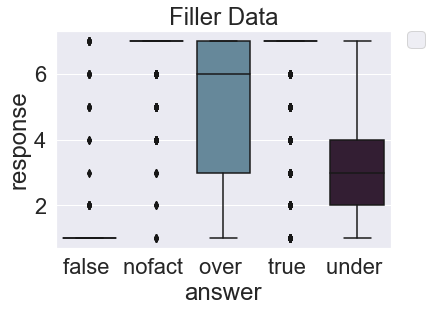

In [44]:
# Try using seaborn to make a box plot
g = sns.boxplot(x="answer",y="response",data=filler)
g.set_title("Filler Data")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [37]:
# filler.head()

In [101]:
tpv = test.pivot_table(index=['answer', 'trial','story','response'], aggfunc='count')
# tpv.to_csv("test_pv.csv", header=True)

In [102]:
tpv

Nat_lang  Unnamed: 0  factors  modal  \
answer trial story     response                                         
MA     high  bank      4                1           1        1      1   
                       6                3           3        3      3   
                       7               54          54       54     54   
             envelopes 3                2           2        2      2   
                       4                1           1        1      1   
...                                   ...         ...      ...    ...   
MS     low   yoga      3                7           7        7      7   
                       4               12          12       12     12   
                       5               14          14       14     14   
                       6                5           5        5      5   
                       7                4           4        4      4   

                                 other_langs  string  subject  wh  
answer trial story     response                                    
MA     high  bank      4                   1       1        1   1  
                       6                   1       3        3   3  
                       7                  41      54       54  54  
             envelopes 3                   2       2        2   2  
                       4                   1       1        1   1  
...                                      ...     ...      ...  ..  
MS     low   yoga      3                   3       7        7   7  
                       4                  11      12       12  12  
                       5                  10      14       14  14  
                       6                   3       5        5   5  
                       7                   4       4        4   4  

[346 rows x 8 columns]

In [58]:
t = pd.read_csv("test_pv.csv")

In [ ]:
g = sns.catplot(x="response", kind="count", col="modal", hue="answer", palette="ch:.25", data=high, height=8.27, aspect=11.7/8.27)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('High Stakes')
plt.show()

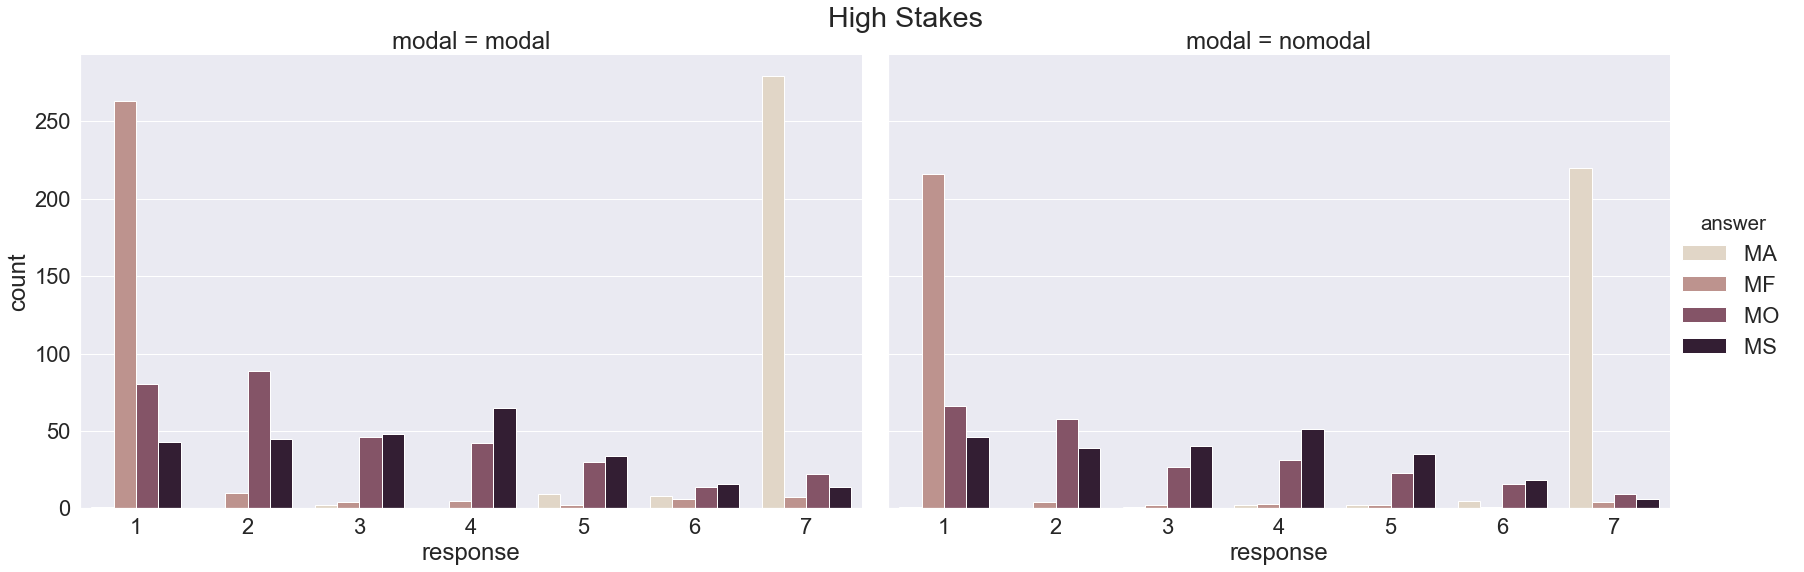

In [51]:
g = sns.catplot(x="response", kind="count", col="modal", hue="answer", palette="ch:.25", data=high, height=8.27, aspect=11.7/8.27)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('High Stakes')
plt.show()

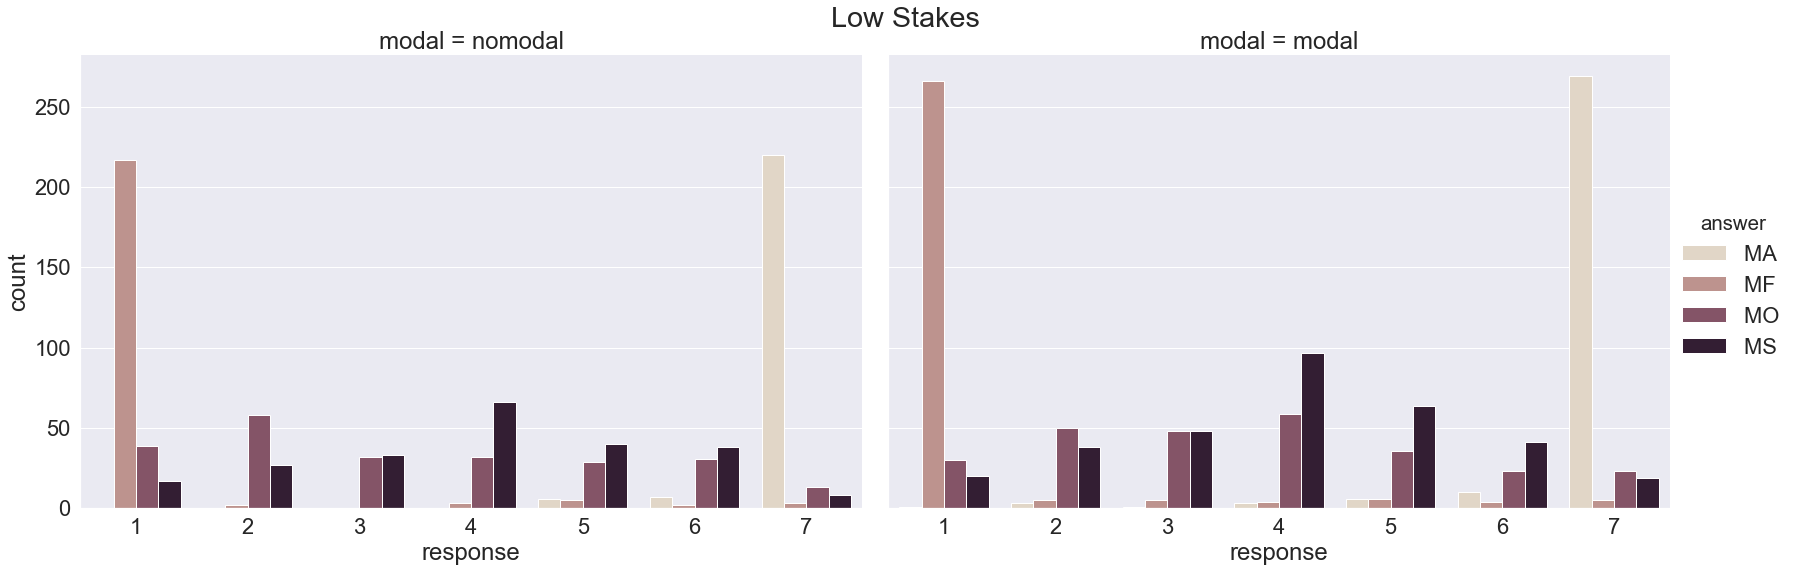

In [52]:
g = sns.catplot(x="response", kind="count", col="modal", hue="answer", palette="ch:.25", data=low, height=8.27, aspect=11.7/8.27)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Low Stakes')
plt.show()

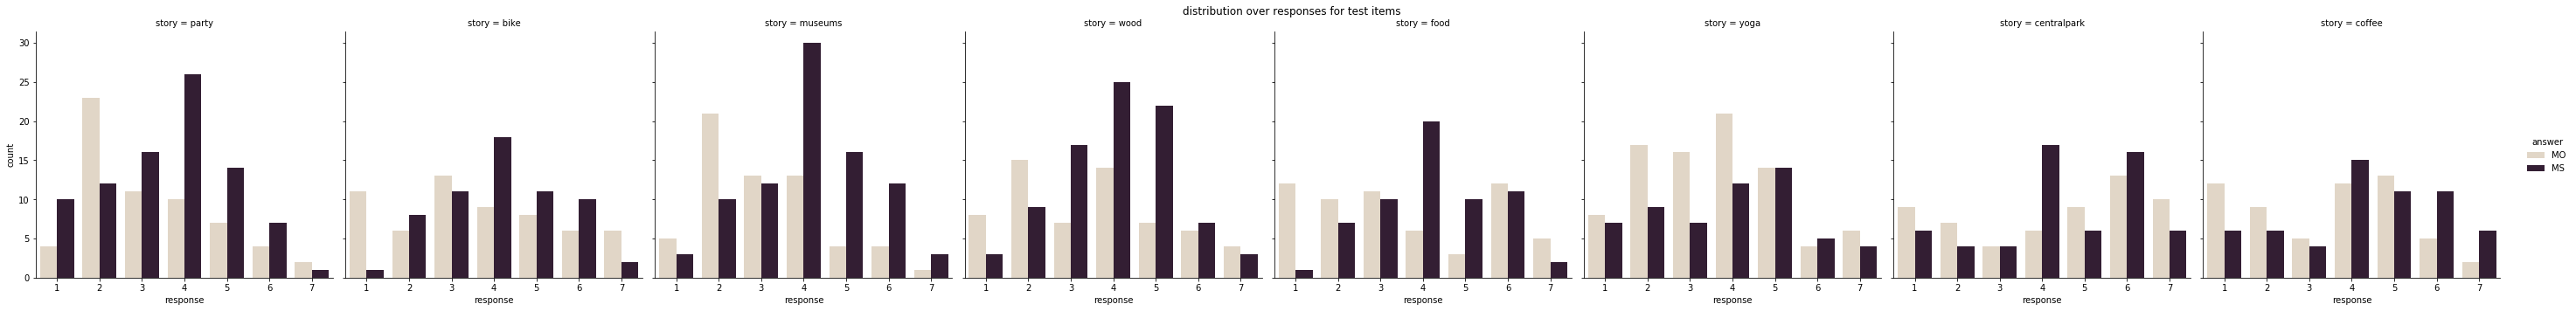

In [77]:
g = sns.catplot(x="response", kind="count", hue="answer", col="story", palette="ch:.25", data=low_msmo)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('distribution over responses for test items')
plt.show()
g.savefig("low_msmo.png")

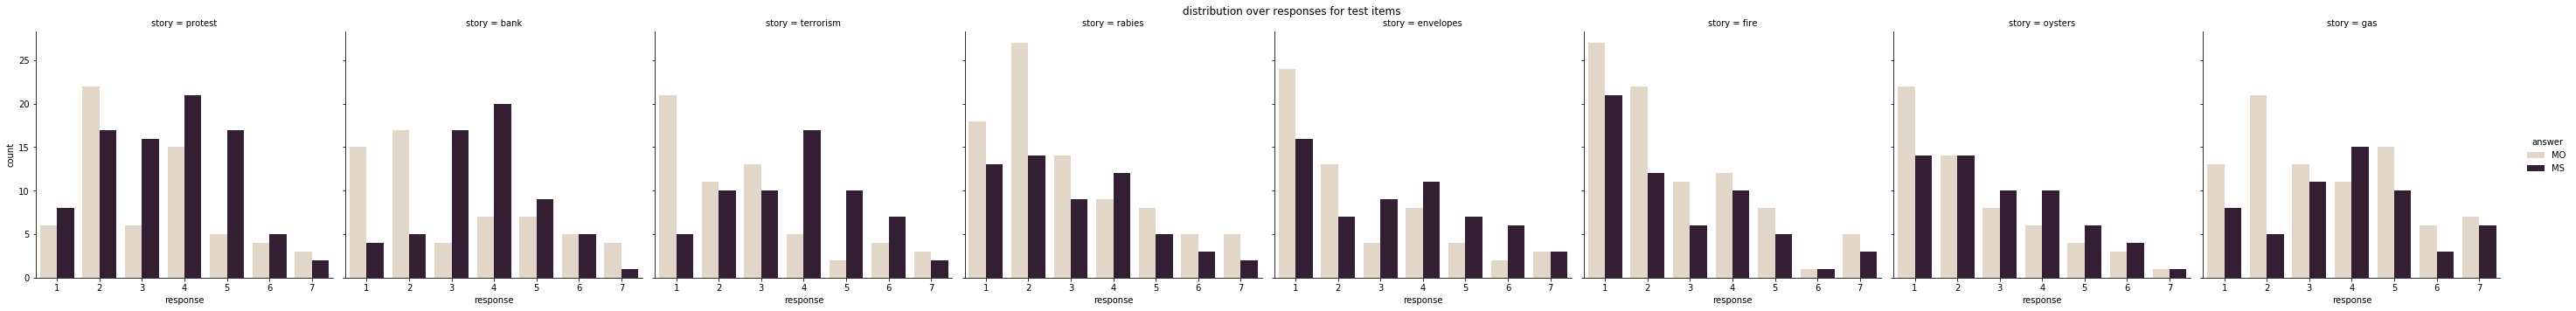

In [82]:
g = sns.catplot(x="response", kind="count", hue="answer", col="story", palette="ch:.25", data=high_msmo)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('distribution over responses for test items')
plt.show()
g.savefig("high_msmo.png")